# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

## Cargar datos

In [15]:
# Carga los archivos de datos en diferentes DataFrames
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [22]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Tarifas

In [25]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [26]:
# Imprime una muestra de los datos para las tarifas

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se muestran los dos renglones que conforman la tabla de Plans. Personalmente, me llama la atención la diferencia entre la cantidad de mensajes incluídos para cada paquete.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [27]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [28]:
# Imprime una muestra de datos para usuarios

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [29]:
users['reg_date']=pd.to_datetime(users['reg_date'])

In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [31]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [32]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [33]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [34]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [35]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [37]:
messages['message_date']=pd.to_datetime(messages['message_date'])


In [38]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [39]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [40]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [41]:
internet['session_date']=pd.to_datetime(internet['session_date'])

In [42]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [43]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [44]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El plan Surf incluye 500 minutos, 50 mensajes y 15360 MB al mes, por una farifa de $20. Minetras, Ultimate tiene 1000 mensajes , igual número de minutos, y 30720MB. Su costo es de $70. 

# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



In [45]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month
mins_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
mins_per_user.head()


,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [46]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month
calls_per_user = calls.groupby(['user_id', 'month'])['user_id'].count().rename('nm_calls').reset_index()
calls_per_user.head()


,user_id,month,nm_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [47]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month']=messages['message_date'].dt.month
messages_per_user = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.rename(columns={'id':'messages'}, inplace=True)
messages_per_user.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [48]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month']=internet['session_date'].dt.month
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.head()


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [49]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_user = mins_per_user.merge(messages_per_user, on=['user_id', 'month'], how='outer')
monthly_user = monthly_user.merge(calls_per_user, on=['user_id', 'month'], how='outer')
monthly_user = monthly_user.merge(internet_per_user, on=['user_id', 'month'], how='outer')
monthly_user.head()

,user_id,month,duration,messages,nm_calls,mb_used
0,1000,12,116.83,11.0,16.0,1901.47
1,1001,8,171.14,30.0,27.0,6919.15
2,1001,9,297.69,44.0,49.0,13314.82
3,1001,10,374.11,53.0,65.0,22330.49
4,1001,11,404.59,36.0,64.0,18504.30


In [50]:
us = users[['user_id', 'plan', 'city']]
monthly_user = monthly_user.merge(us, on=['user_id'], how='outer')
monthly_user = monthly_user.rename(columns={'plan':'plan_name'})
monthly_user.head()

,user_id,month,duration,messages,nm_calls,mb_used,plan_name,city
0,1000,12.0,116.83,11.0,16.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,171.14,30.0,27.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,297.69,44.0,49.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,374.11,53.0,65.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,404.59,36.0,64.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [63]:
# Añade la información de la tarifa
monthly_user = monthly_user.merge(plans, on=['plan_name'], how='outer')
monthly_user.head()

,user_id,month,duration,messages,nm_calls,mb_used,plan_name,city,messages_included_x,mb_per_month_included_x,...,usd_per_gb_y,usd_per_message_y,usd_per_minute_y,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,116.83,11.0,16.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,7,0.01,0.01,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,9.32,15.0,2.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,...,7,0.01,0.01,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,54.79,139.0,9.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,...,7,0.01,0.01,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,450.21,21.0,71.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,...,7,0.01,0.01,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,422.81,37.0,63.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,...,7,0.01,0.01,1000,30720,3000,70,7,0.01,0.01


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [64]:
monthly_user.columns

Index(['user_id', 'month', 'duration', 'messages', 'nm_calls', 'mb_used',
       'plan_name', 'city', 'messages_included_x', 'mb_per_month_included_x',
       'minutes_included_x', 'usd_monthly_pay_x', 'usd_per_gb_x',
       'usd_per_message_x', 'usd_per_minute_x', 'minutos_extra',
       'internet_extra', 'mensajes_extra', 'messages_included_y',
       'mb_per_month_included_y', 'minutes_included_y', 'usd_monthly_pay_y',
       'usd_per_gb_y', 'usd_per_message_y', 'usd_per_minute_y',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute'],
      dtype='object')

Este Dataframe. monthly_user, contiene toda la información que requeriremos en los siguientes ejercicios!

In [66]:
# Calcula el ingreso mensual para cada usuario
monthly_user['minutos_extra'] = (monthly_user['duration'] - monthly_user['minutes_included_y']).clip(lower=0)
monthly_user['internet_extra'] = (monthly_user['mb_used'] - monthly_user['mb_per_month_included']).clip(lower=0)
monthly_user['mensajes_extra'] = (monthly_user['messages'] - monthly_user['messages_included']).clip(lower=0)


In [67]:
monthly_user['costo_total'] = monthly_user['usd_monthly_pay'] + monthly_user['minutos_extra']*monthly_user['usd_per_minute'] + monthly_user['mensajes_extra']*monthly_user['usd_per_message']+ np.ceil(monthly_user['internet_extra']/1024)*monthly_user['usd_per_gb']

In [68]:
monthly_user['costo_total']

0       70.0
1       70.0
2       84.0
3       70.0
4       70.0
        ... 
2298     NaN
2299     NaN
2300     NaN
2301     NaN
2302     NaN
Name: costo_total, Length: 2303, dtype: float64

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [69]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avdur=monthly_user.groupby(['duration','month','plan_name'])['duration'].mean()
avdur.head


<bound method NDFrame.head of duration  month  plan_name
0.00      10.0   surf            0.00
          11.0   ultimate        0.00
1.20      9.0    surf            1.20
3.90      8.0    surf            3.90
4.60      11.0   surf            4.60
                               ...   
1222.37   12.0   ultimate     1222.37
1234.57   11.0   surf         1234.57
1283.20   12.0   surf         1283.20
1292.09   12.0   ultimate     1292.09
1431.22   12.0   surf         1431.22
Name: duration, Length: 2258, dtype: float64>

<AxesSubplot:title={'center':'Total de Minutos'}, ylabel='Frequency'>

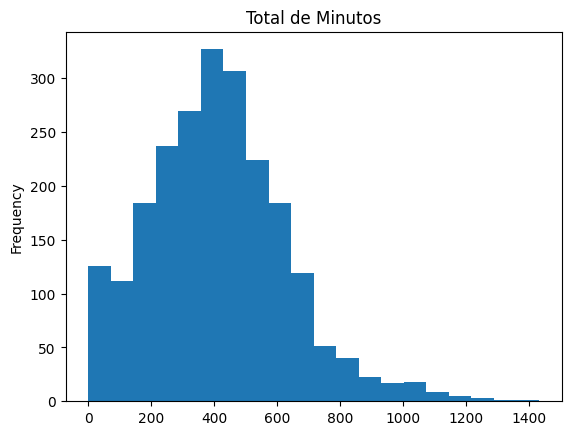

In [70]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
monthly_user['duration'].plot(bins=20,
                      title='Total de Minutos',
                      ylabel='Frequency',
                      kind='hist')


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [71]:
# Calcula la media y la varianza de la duración mensual de llamadas.
monthly_user['duration'].describe()


count    2258.000000
mean      411.492586
std       219.290453
min         0.000000
25%       258.075000
50%       404.270000
75%       543.335000
max      1431.220000
Name: duration, dtype: float64

De estos obtenemos que la media es 411.492586, mientras que la desviación estándar es 219.290453. Esto significaría una varianza de 47,961

Traza una boxplot para comprarar las distribuciones.

[Text(0.5, 1.0, 'Distribución de Duraciones')]

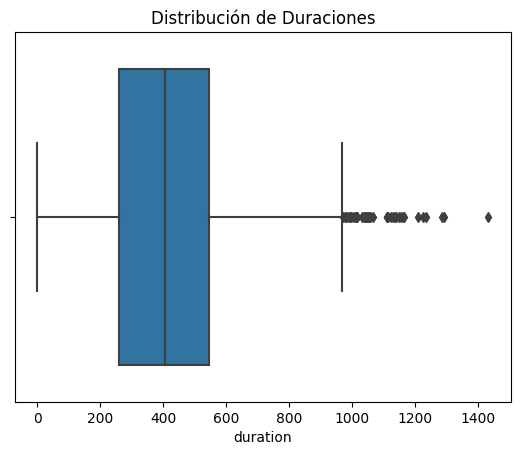

In [72]:
sns.boxplot(x='duration', data=monthly_user).set(title='Distribución de Duraciones')

Como vimos desde el histogram anterior, la media del dataset está en torno a los 400 minutos, con muestras menos representativas a partir de los 500.

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [73]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messum=monthly_user.groupby(['month','plan_name'])['messages'].sum().reset_index()
messum.head()
messum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      24 non-null     float64
 1   plan_name  24 non-null     object 
 2   messages   24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


Text(0.5, 1.0, 'Comparación de Paquetes')

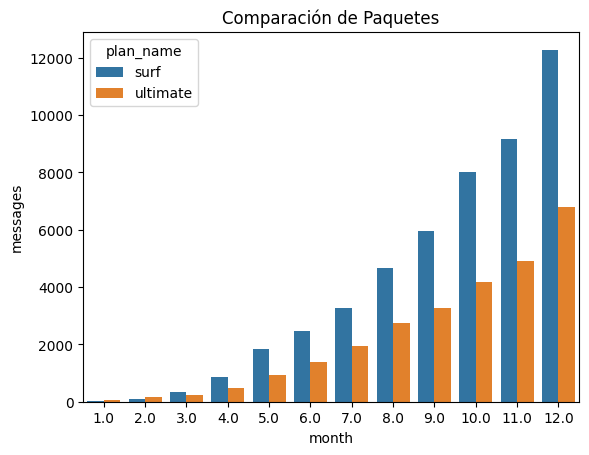

In [74]:
sns.barplot(data=messum, x='month',y='messages',hue='plan_name')
plt.title('Comparación de Paquetes')


In [75]:
surfall=monthly_user[monthly_user['plan_name']=='surf']
ultimateall=monthly_user[monthly_user['plan_name']=='ultimate']
print("El PLan Surf tiene ",surfall['user_id'].count()," usuarios, y el Ultimate ",ultimateall['user_id'].count())

El PLan Surf tiene  1579  usuarios, y el Ultimate  724


Los usuarios de Surf tienden a enviar más mensajes, hemos visto que este paquete tiene más suscriptores.

In [76]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

mbsum=monthly_user.groupby(['month','plan_name'])['mb_used'].sum().reset_index()

Text(0.5, 1.0, 'Comparación de Consumo por Paquetes')

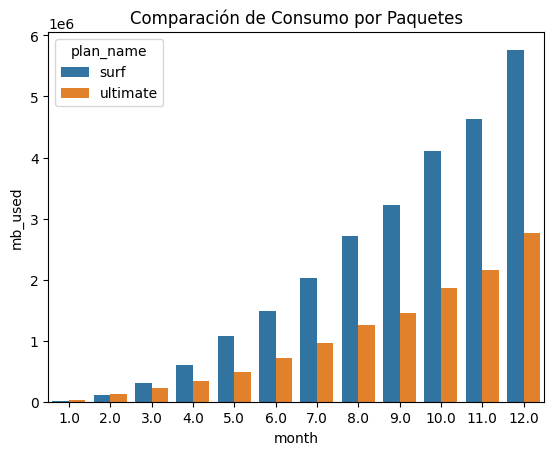

In [77]:
sns.barplot(data=mbsum, x='month',y='mb_used',hue='plan_name')
plt.title('Comparación de Consumo por Paquetes')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Es mayor el tráfico que se tiene es en el pauqete Surf, este paquete tiene más suscriptores.

### Internet

Text(0.5, 1.0, 'Comparación de Consumo por Paquetes')

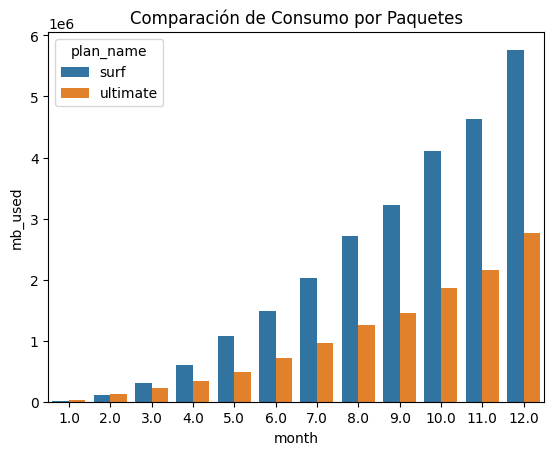

In [78]:
sns.barplot(data=mbsum, x='month',y='mb_used',hue='plan_name')
plt.title('Comparación de Consumo por Paquetes')

Es mayor el tráfico que se tiene es en el paquete Surf, lo cual era de esperarse por su mayor número de suscriptores.

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

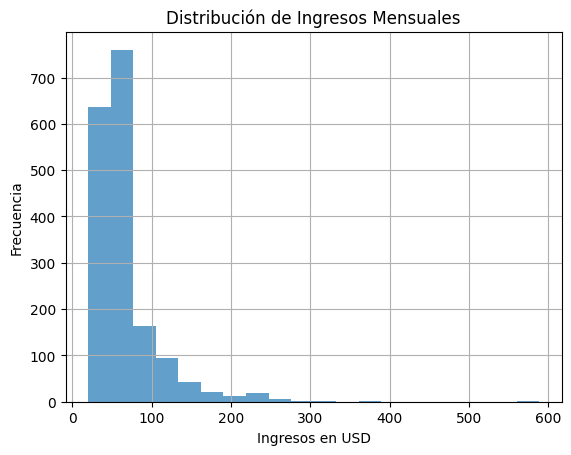

In [79]:
monthly_user['costo_total'].hist(bins=20, alpha=0.7)
plt.title("Distribución de Ingresos Mensuales")
plt.xlabel("Ingresos en USD")
plt.ylabel("Frecuencia")
plt.show()

In [80]:
monthly_user.groupby('plan_name')['costo_total'].sum()

plan_name
surf        70811.4871
ultimate    41832.0000
Name: costo_total, dtype: float64

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Según la información mostrada arriba, el increso por Surf es aproximadamente 1.7 veces el de Ultimate.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [81]:
# Prueba las hipótesis
alpha = 0.05



In [82]:
monthly_user = monthly_user.fillna(0)

In [83]:
test_results = st.ttest_ind(monthly_user[monthly_user['plan_name'] == 'surf']['costo_total'],
                            monthly_user[monthly_user['plan_name'] == 'ultimate']['costo_total'])
print("Valor p de la prueba t para comparar ingresos entre planes:", test_results.pvalue)
print(test_results)

Valor p de la prueba t para comparar ingresos entre planes: 1.1610685656418898e-09
Ttest_indResult(statistic=-6.11076630719456, pvalue=1.1610685656418898e-09)


La hipótesis se rechaza con base en el resultado del p test, menor que el alpha de 0.05.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [84]:
# Prueba las hipótesisalpha
alpha = 0.05


In [85]:
test_results = st.ttest_ind(monthly_user[monthly_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['costo_total'],
                            monthly_user[monthly_user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['costo_total'])
print("Valor p de la prueba t para comparar ingresos entre planes:", test_results.pvalue)
print(test_results)

Valor p de la prueba t para comparar ingresos entre planes: 0.004571297116154214
Ttest_indResult(statistic=-2.8385749741312463, pvalue=0.004571297116154214)


En esta ocasión, aunque el valor p es mucho más alto que la anterior, tampoco supera el alpha de 0.05, por lo que la hipótessi es rechazada.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

In [ ]:
Hemos logrado consolidar la información sobre el uso de los productos ofrecidos por Megaline. 
Cuántos clientes tiene cada uno de sus productos, Surf y Ultimate y ediante gráficasm y tablas, qué uso se les da.
También pusimos poner a prueba y eventualente descartar un par de hipótesis sobre lo mismo.

Personalmente, me parece una expereincia de aprendizaje enriquecedora gracias al apoyo de nuesgtro coordinador, y de los compañeros.
    